# Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.metrics import auc
from sklearn.metrics import roc_auc_score

# Train Data

In [2]:
train_data = pd.read_csv("train.csv")

In [3]:
train_data.head()

,id,created_at,campaign_var_1,campaign_var_2,products_purchased,signup_date,user_activity_var_1,user_activity_var_2,user_activity_var_3,user_activity_var_4,user_activity_var_5,user_activity_var_6,user_activity_var_7,user_activity_var_8,user_activity_var_9,user_activity_var_10,user_activity_var_11,user_activity_var_12,buy
0,1,2021-01-01,1,2,2.0,2020-09-24,0,0,0,0,0,0,1,1,0,0,0,0,0
1,2,2021-01-01,2,1,2.0,2020-09-19,1,0,1,0,0,0,1,0,0,0,0,0,0
2,3,2021-01-01,9,3,3.0,2021-08-11,1,0,0,0,0,0,0,0,0,0,0,0,0
3,4,2021-01-01,6,7,2.0,2017-10-04,0,0,0,0,0,0,0,0,0,0,0,0,0
4,5,2021-01-01,4,6,NaN,2020-06-08,0,0,0,0,0,0,1,0,0,0,1,0,0


In [4]:
train_data.shape

(39161, 19)

In [5]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39161 entries, 0 to 39160
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    39161 non-null  int64  
 1   created_at            39161 non-null  object 
 2   campaign_var_1        39161 non-null  int64  
 3   campaign_var_2        39161 non-null  int64  
 4   products_purchased    18250 non-null  float64
 5   signup_date           24048 non-null  object 
 6   user_activity_var_1   39161 non-null  int64  
 7   user_activity_var_2   39161 non-null  int64  
 8   user_activity_var_3   39161 non-null  int64  
 9   user_activity_var_4   39161 non-null  int64  
 10  user_activity_var_5   39161 non-null  int64  
 11  user_activity_var_6   39161 non-null  int64  
 12  user_activity_var_7   39161 non-null  int64  
 13  user_activity_var_8   39161 non-null  int64  
 14  user_activity_var_9   39161 non-null  int64  
 15  user_activity_var_1

In [6]:
# statiscal measures
train_data.describe()

,id,campaign_var_1,campaign_var_2,products_purchased,user_activity_var_1,user_activity_var_2,user_activity_var_3,user_activity_var_4,user_activity_var_5,user_activity_var_6,user_activity_var_7,user_activity_var_8,user_activity_var_9,user_activity_var_10,user_activity_var_11,user_activity_var_12,buy
count,39161.000000,39161.000000,39161.000000,18250.000000,39161.000000,39161.000000,39161.000000,39161.000000,39161.000000,39161.000000,39161.000000,39161.000000,39161.000000,39161.000000,39161.000000,39161.000000,39161.000000
mean,19581.000000,6.523812,6.452746,2.154137,0.400092,0.006716,0.102832,0.011465,0.151503,0.499834,0.286612,0.174434,0.011440,0.000383,0.218942,0.000562,0.051020
std,11304.951283,3.472944,2.614296,0.779815,0.509194,0.081676,0.303743,0.106463,0.359681,0.558166,0.455784,0.379689,0.106346,0.019568,0.431544,0.023696,0.220042
min,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,9791.000000,4.000000,5.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,19581.000000,6.000000,6.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,29371.000000,9.000000,8.000000,3.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,39161.000000,16.000000,15.000000,4.000000,3.000000,1.000000,1.000000,1.000000,2.000000,3.000000,2.000000,2.000000,1.000000,1.000000,4.000000,1.000000,1.000000


# checking for missing values

In [7]:
train_data.isnull().sum()

id                          0
created_at                  0
campaign_var_1              0
campaign_var_2              0
products_purchased      20911
signup_date             15113
user_activity_var_1         0
user_activity_var_2         0
user_activity_var_3         0
user_activity_var_4         0
user_activity_var_5         0
user_activity_var_6         0
user_activity_var_7         0
user_activity_var_8         0
user_activity_var_9         0
user_activity_var_10        0
user_activity_var_11        0
user_activity_var_12        0
buy                         0
dtype: int64

In [8]:
#precentage of missing values
(train_data.isnull().sum()*100/len(train_data)).sort_values(ascending = False)

products_purchased      53.397513
signup_date             38.591966
buy                      0.000000
user_activity_var_3      0.000000
created_at               0.000000
campaign_var_1           0.000000
campaign_var_2           0.000000
user_activity_var_1      0.000000
user_activity_var_2      0.000000
user_activity_var_4      0.000000
user_activity_var_12     0.000000
user_activity_var_5      0.000000
user_activity_var_6      0.000000
user_activity_var_7      0.000000
user_activity_var_8      0.000000
user_activity_var_9      0.000000
user_activity_var_10     0.000000
user_activity_var_11     0.000000
id                       0.000000
dtype: float64

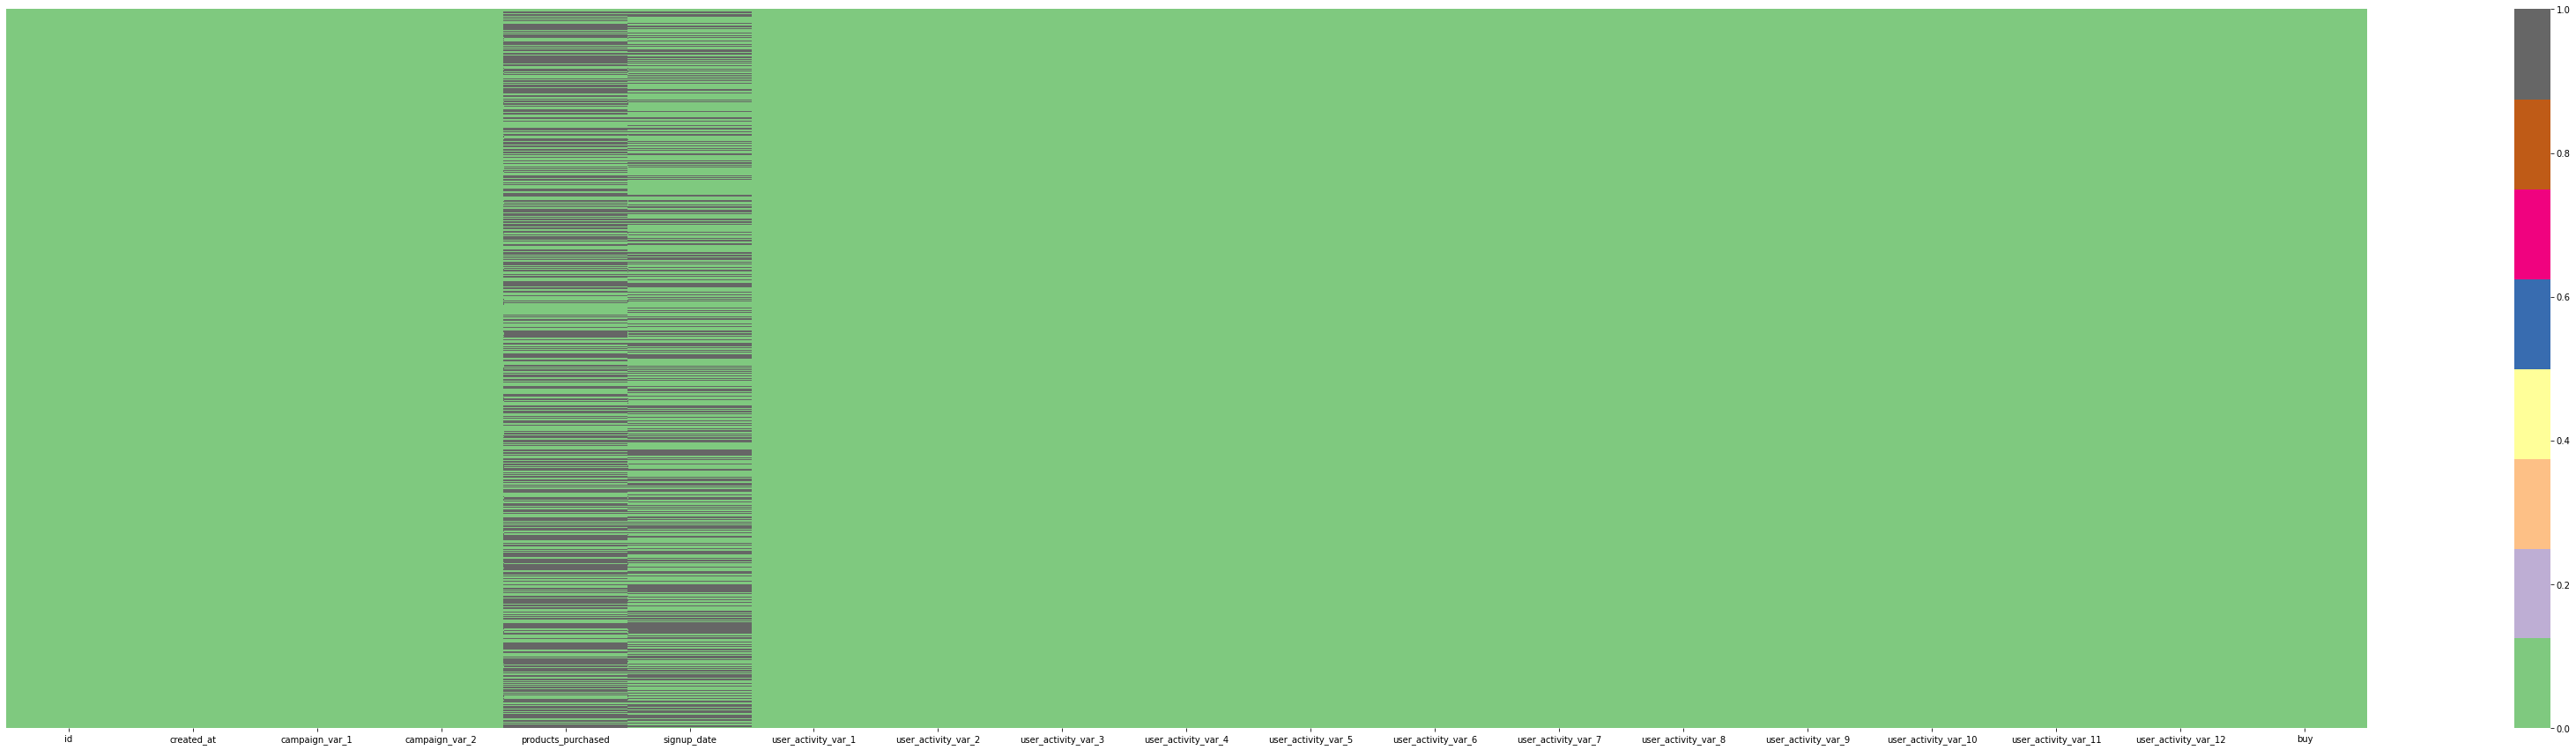

In [9]:
# Visual Representation of missing values using heatmap
plt.figure(figsize = (60,15))
sns.heatmap(train_data.isnull(), yticklabels = False , cmap = 'Accent')
plt.show()

# EDA

In [10]:
train_data['products_purchased'].unique()

array([ 2.,  3., nan,  1.,  4.])

In [11]:
train_data['products_purchased'].value_counts()

2.0    8867
3.0    5024
1.0    3643
4.0     716
Name: products_purchased, dtype: int64

C:\Users\DELL\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='products_purchased', ylabel='Density'>

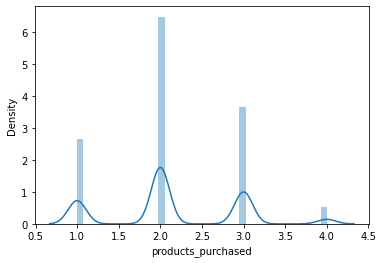

In [12]:
sns.distplot(train_data['products_purchased'])

C:\Users\DELL\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='products_purchased'>

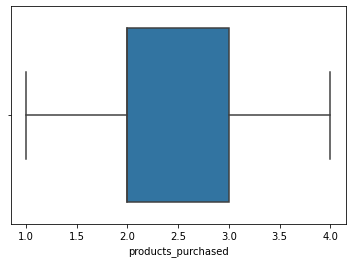

In [13]:
sns.boxplot(train_data['products_purchased'])

C:\Users\DELL\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='products_purchased', ylabel='count'>

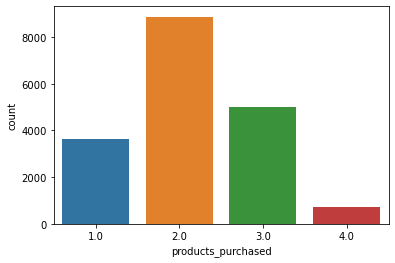

In [14]:
sns.countplot(train_data['products_purchased'])

# handle missing values

In [15]:
train_data['products_purchased'].fillna(train_data['products_purchased'].mean(), inplace = True)

In [16]:
train_data['products_purchased'] = train_data['products_purchased'].astype('int32')

In [17]:
train_data.head()

,id,created_at,campaign_var_1,campaign_var_2,products_purchased,signup_date,user_activity_var_1,user_activity_var_2,user_activity_var_3,user_activity_var_4,user_activity_var_5,user_activity_var_6,user_activity_var_7,user_activity_var_8,user_activity_var_9,user_activity_var_10,user_activity_var_11,user_activity_var_12,buy
0,1,2021-01-01,1,2,2,2020-09-24,0,0,0,0,0,0,1,1,0,0,0,0,0
1,2,2021-01-01,2,1,2,2020-09-19,1,0,1,0,0,0,1,0,0,0,0,0,0
2,3,2021-01-01,9,3,3,2021-08-11,1,0,0,0,0,0,0,0,0,0,0,0,0
3,4,2021-01-01,6,7,2,2017-10-04,0,0,0,0,0,0,0,0,0,0,0,0,0
4,5,2021-01-01,4,6,2,2020-06-08,0,0,0,0,0,0,1,0,0,0,1,0,0


In [18]:
train_data['signup_date'].value_counts()

2021-07-18    45
2021-09-20    38
2021-01-28    38
2021-09-10    38
2021-08-03    38
              ..
2017-06-02     1
2018-02-14     1
2017-05-08     1
2017-12-22     1
2017-05-28     1
Name: signup_date, Length: 1800, dtype: int64

In [19]:
train_data['created_at'] = pd.to_datetime(train_data['created_at'], format = '%Y-%m-%dT', errors = 'coerce')

In [20]:
# split date column into year , month, day
train_data['created_at_year'] = train_data['created_at'].dt.year
train_data['created_at_month'] = train_data['created_at'].dt.month
train_data['created_at_day'] = train_data['created_at'].dt.day

In [21]:
train_data.drop([ 'signup_date', 'created_at'], axis = 1, inplace = True)

In [22]:
train_data.head()

,id,campaign_var_1,campaign_var_2,products_purchased,user_activity_var_1,user_activity_var_2,user_activity_var_3,user_activity_var_4,user_activity_var_5,user_activity_var_6,user_activity_var_7,user_activity_var_8,user_activity_var_9,user_activity_var_10,user_activity_var_11,user_activity_var_12,buy,created_at_year,created_at_month,created_at_day
0,1,1,2,2,0,0,0,0,0,0,1,1,0,0,0,0,0,2021,1,1
1,2,2,1,2,1,0,1,0,0,0,1,0,0,0,0,0,0,2021,1,1
2,3,9,3,3,1,0,0,0,0,0,0,0,0,0,0,0,0,2021,1,1
3,4,6,7,2,0,0,0,0,0,0,0,0,0,0,0,0,0,2021,1,1
4,5,4,6,2,0,0,0,0,0,0,1,0,0,0,1,0,0,2021,1,1


In [23]:
train_data.drop('created_at_year', axis = 1, inplace = True)

In [24]:
train_data['created_at_day'].value_counts()

25    1393
26    1389
10    1380
24    1375
21    1361
23    1331
15    1325
28    1309
22    1306
27    1298
17    1291
4     1285
6     1283
13    1274
14    1272
19    1266
9     1261
18    1259
16    1258
12    1256
30    1251
20    1249
7     1240
29    1238
11    1224
2     1223
8     1212
3     1202
5     1190
1     1180
31     780
Name: created_at_day, dtype: int64

In [25]:
train_data['created_at_month'].value_counts()

12    4890
10    4685
11    4658
9     4160
8     4094
7     3540
6     3217
5     2799
4     2356
3     2048
2     1442
1     1272
Name: created_at_month, dtype: int64

In [26]:
#  Average percentage of buyed products
month_wise_buy =train_data.groupby(['created_at_month'])['buy'].mean()
month_wise_buy

created_at_month
1     0.051887
2     0.063800
3     0.052246
4     0.054329
5     0.051804
6     0.056885
7     0.055932
8     0.054470
9     0.053606
10    0.046958
11    0.042293
12    0.044172
Name: buy, dtype: float64

In [27]:
# no. of  products purchased every month
month_wise_products =train_data.groupby(['created_at_month'])['products_purchased'].count()
month_wise_products

created_at_month
1     1272
2     1442
3     2048
4     2356
5     2799
6     3217
7     3540
8     4094
9     4160
10    4685
11    4658
12    4890
Name: products_purchased, dtype: int64

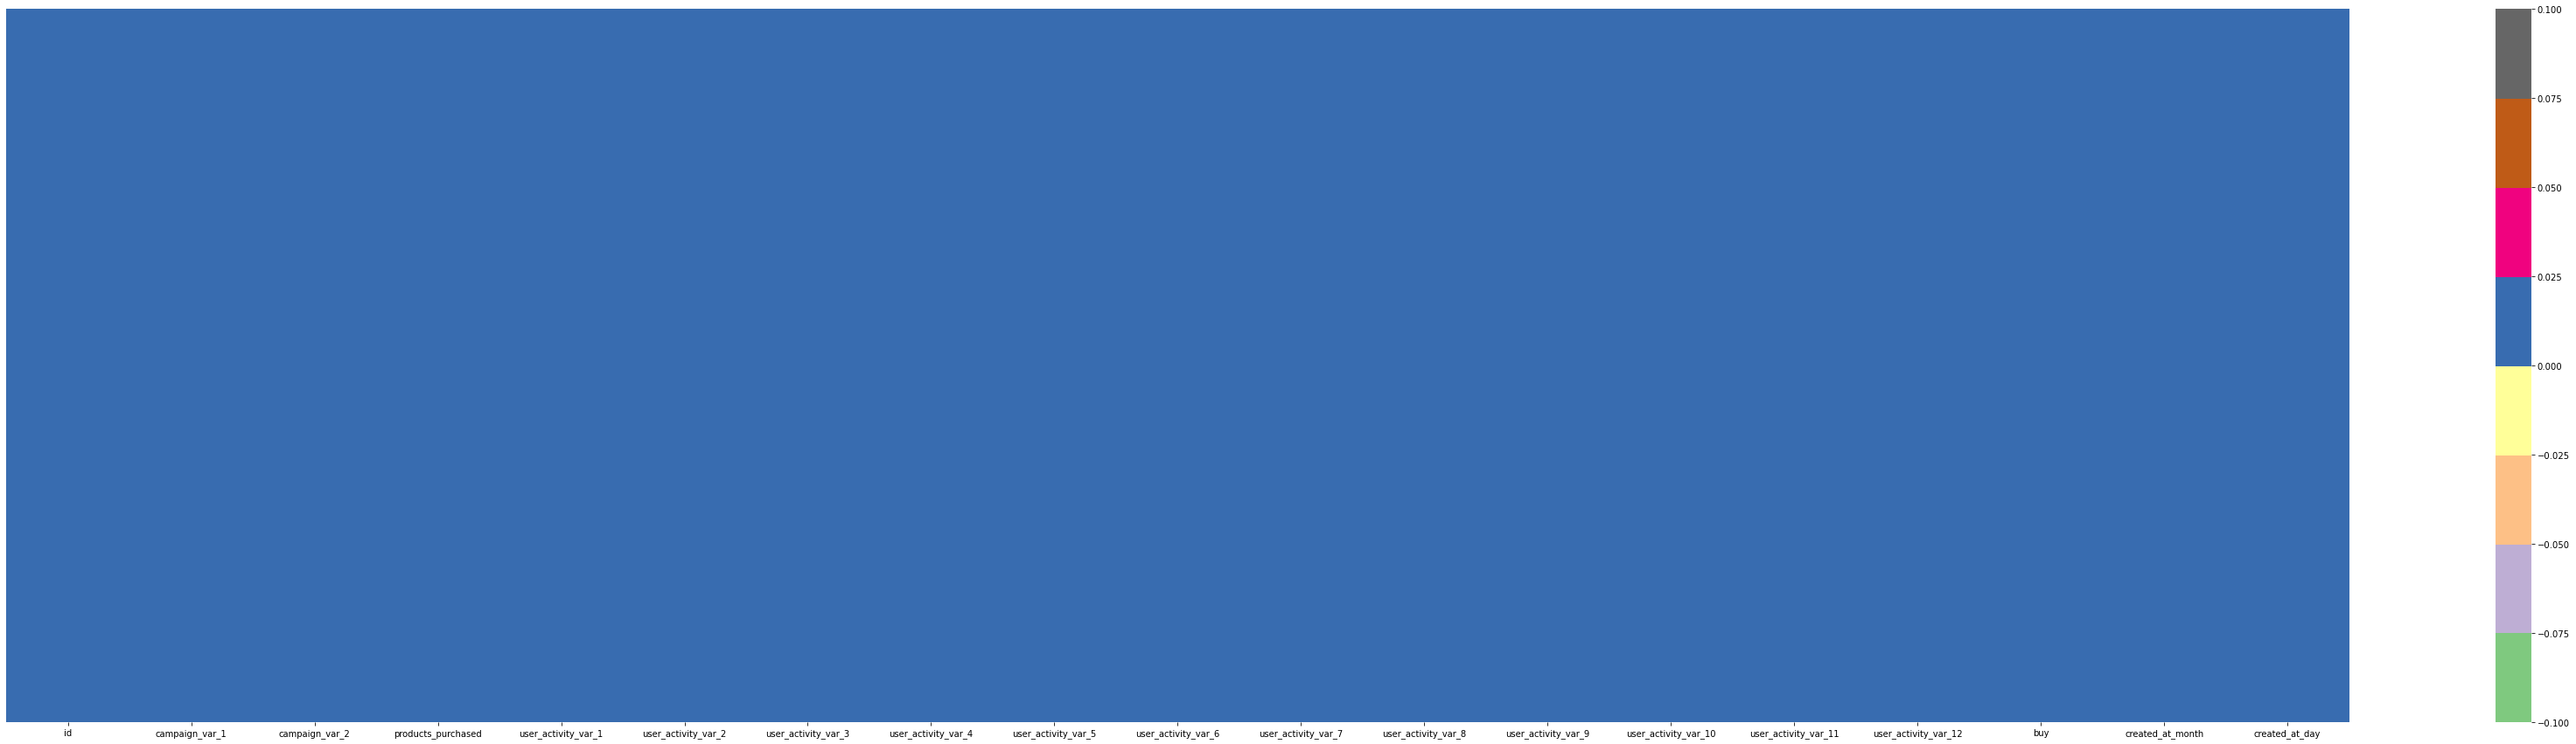

In [28]:
# After handling missing values
plt.figure(figsize = (60,15))
sns.heatmap(train_data.isnull(), yticklabels = False , cmap = 'Accent')
plt.show()

C:\Users\DELL\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='buy', ylabel='Density'>

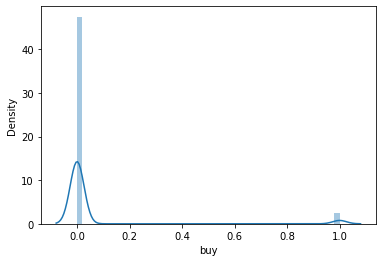

In [29]:
sns.distplot(train_data['buy'])

C:\Users\DELL\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='buy', ylabel='count'>

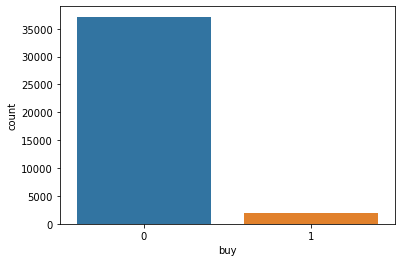

In [30]:
sns.countplot(train_data['buy'])

<AxesSubplot:>

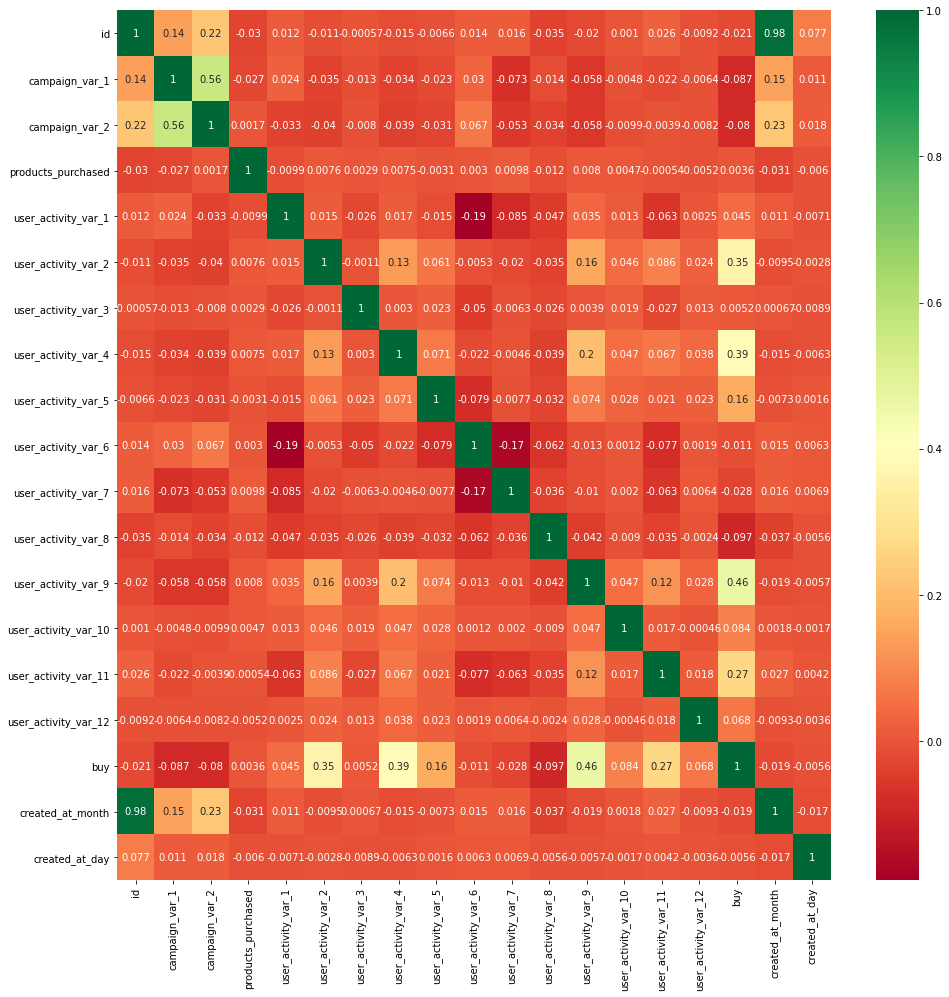

In [31]:
# To see correlation between indepent and dependent features
plt.figure(figsize= (16,16) )
sns.heatmap(train_data.corr(), annot = True , cmap = 'RdYlGn')

In [32]:
#sns.pairplot(train_data , hue = 'buy')

# Check Data is Balanced or not

In [33]:
train_data['buy'].value_counts()

0    37163
1     1998
Name: buy, dtype: int64

In [34]:
# use smote technique 
import sklearn
from imblearn.over_sampling import SMOTE

In [35]:
from sklearn.utils import resample
#create two different dataframe of majority and minority class 
df_majority = train_data[(train_data['buy']==0)] 
df_minority = train_data[(train_data['buy']==1)] 
# upsample minority class
df_minority_upsampled = resample(df_minority, 
                                 replace=True,    # sample with replacement
                                 n_samples=37000 , # to match majority class
                                 random_state=42)  # reproducible results
# Combine majority class with upsampled minority class
df_upsampled = pd.concat([df_minority_upsampled, df_majority])

In [36]:
df_upsampled['buy'].value_counts()

0    37163
1    37000
Name: buy, dtype: int64

# Split Data into X and Y

In [37]:
X = df_upsampled.drop('buy', axis = 1)
y = df_upsampled['buy']

# Train and test split

In [38]:
from sklearn.model_selection import train_test_split
X_train , X_test , y_train, y_test = train_test_split(X, y , test_size = 0.3, random_state = 42)
eval_set=[(X_test, y_test)]

# Logistic Regression

In [39]:
from sklearn.linear_model import LogisticRegression  
classifier= LogisticRegression(random_state=8)  
classifier.fit(X_train, y_train)  

C:\Users\DELL\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=8)

In [40]:
y_pred= classifier.predict(X_test)  

In [41]:
y_pred

array([0, 1, 1, ..., 1, 1, 0], dtype=int64)

In [42]:
from sklearn.metrics import confusion_matrix  
cm= confusion_matrix(y_test, y_pred)  

In [43]:
cm

array([[8358, 2764],
       [2586, 8541]], dtype=int64)

<AxesSubplot:>

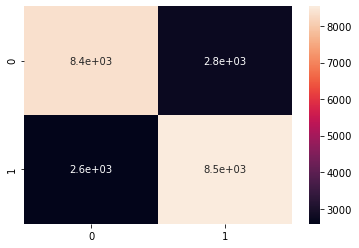

In [44]:
sns.heatmap(cm , annot = True)

In [45]:
train_score_lr =classifier.score(X_train, y_train)
train_score_lr

0.7565011364949724

In [46]:
test_score_lr =classifier.score(X_test, y_test)
test_score_lr

0.7595397545957122

In [47]:
from sklearn.metrics import classification_report
print( classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.76      0.75      0.76     11122
           1       0.76      0.77      0.76     11127

    accuracy                           0.76     22249
   macro avg       0.76      0.76      0.76     22249
weighted avg       0.76      0.76      0.76     22249



# XGBoost CLassifier

In [48]:
import xgboost
model = xgboost.sklearn.XGBClassifier(
    objective="binary:logistic", 
    learning_rate=0.09, 
    seed=9616, 
    max_depth=30, 
    gamma=10, 
    n_estimators=500)

In [49]:
model.fit(X_train, y_train, early_stopping_rounds=20, eval_metric= "auc", eval_set=eval_set, verbose=True)

y_pred = model.predict(X_test)
accuracy = accuracy_score(np.array(y_test).flatten(), y_pred)


[0]	validation_0-auc:0.98330


C:\Users\DELL\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[1]	validation_0-auc:0.98584
[2]	validation_0-auc:0.98772
[3]	validation_0-auc:0.98927
[4]	validation_0-auc:0.99108
[5]	validation_0-auc:0.99171
[6]	validation_0-auc:0.99214
[7]	validation_0-auc:0.99248
[8]	validation_0-auc:0.99313
[9]	validation_0-auc:0.99347
[10]	validation_0-auc:0.99389
[11]	validation_0-auc:0.99410
[12]	validation_0-auc:0.99412
[13]	validation_0-auc:0.99432
[14]	validation_0-auc:0.99439
[15]	validation_0-auc:0.99454
[16]	validation_0-auc:0.99459
[17]	validation_0-auc:0.99465
[18]	validation_0-auc:0.99468
[19]	validation_0-auc:0.99471
[20]	validation_0-auc:0.99478
[21]	validation_0-auc:0.99482
[22]	validation_0-auc:0.99493
[23]	validation_0-auc:0.99497
[24]	validation_0-auc:0.99505
[25]	validation_0-auc:0.99510
[26]	validation_0-auc:0.99515
[27]	validation_0-auc:0.99515
[28]	validation_0-auc:0.99523
[29]	validation_0-auc:0.99523
[30]	validation_0-auc:0.99523
[31]	validation_0-auc:0.99527
[32]	validation_0-auc:0.99528
[33]	validation_0-auc:0.99531
[34]	validation_0-a

In [50]:
model.score(X_train, y_train)

0.9891744038217051

In [51]:
model.score(X_test, y_test)

0.9798193177221448

C:\Users\DELL\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='buy', ylabel='Density'>

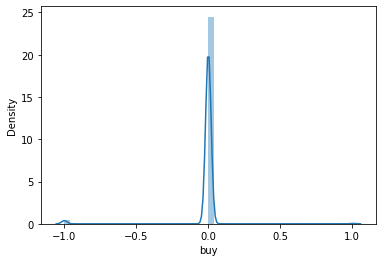

In [52]:
# Distplot to see difference actual and predicted values
sns.distplot(y_test-y_pred)

In [53]:
from sklearn.metrics import classification_report
print( classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.96      0.98     11122
           1       0.96      1.00      0.98     11127

    accuracy                           0.98     22249
   macro avg       0.98      0.98      0.98     22249
weighted avg       0.98      0.98      0.98     22249



In [54]:
submission_file_name = "submission"
print("Accuracy: %.10f%%" % (accuracy * 100.0))
submission_file_name = submission_file_name + ("_Accuracy_%.6f" % (accuracy * 100)) + '_'

accuracy_per_roc_auc = roc_auc_score(np.array(y_test).flatten(), y_pred)
print("ROC-AUC: %.10f%%" % (accuracy_per_roc_auc * 100))
submission_file_name = submission_file_name + ("_ROC-AUC_%.6f" % (accuracy_per_roc_auc * 100))

Accuracy: 97.9819317722%
ROC-AUC: 97.9815670371%


# Random Forest

In [55]:
from sklearn.ensemble import RandomForestClassifier  
rf_classifier= RandomForestClassifier(n_estimators= 10, criterion="entropy")  
rf_classifier.fit(X_train, y_train)  

RandomForestClassifier(criterion='entropy', n_estimators=10)

In [56]:
y_pred= rf_classifier.predict(X_test)  

In [57]:
y_pred

array([0, 0, 1, ..., 1, 1, 1], dtype=int64)

In [58]:
train_rf_score = rf_classifier.score(X_train,y_train)
train_rf_score

0.9999036868667411

In [59]:
test_rf_score = rf_classifier.score(X_train,y_train)
test_rf_score

0.9999036868667411

C:\Users\DELL\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='buy', ylabel='Density'>

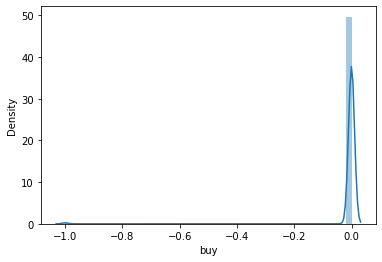

In [60]:
# Distplot to see difference actual and predicted values
sns.distplot(y_test-y_pred)

In [61]:
from sklearn.metrics import classification_report
print( classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.99      0.99     11122
           1       0.99      1.00      0.99     11127

    accuracy                           0.99     22249
   macro avg       0.99      0.99      0.99     22249
weighted avg       0.99      0.99      0.99     22249



# ROC- AUC Score 

In [62]:
submission_file_name = "submission"
print("Accuracy: %.10f%%" % (accuracy * 100.0))
submission_file_name = submission_file_name + ("_Accuracy_%.6f" % (accuracy * 100)) + '_'

accuracy_per_roc_auc = roc_auc_score(np.array(y_test).flatten(), y_pred)
print("ROC-AUC: %.10f%%" % (accuracy_per_roc_auc * 100))
submission_file_name = submission_file_name + ("_ROC-AUC_%.6f" % (accuracy_per_roc_auc * 100))

Accuracy: 97.9819317722%
ROC-AUC: 99.3930947671%


In [63]:
import pickle
pickle.dump(rf_classifier , open('D2C startup.pkl', 'wb' ))

In [64]:
saved_model = pickle.load(open('D2C startup.pkl', 'rb'))

# Test Data

In [65]:
test_data = pd.read_csv("test.csv")

In [66]:
test_data.head()

,id,created_at,campaign_var_1,campaign_var_2,products_purchased,signup_date,user_activity_var_1,user_activity_var_2,user_activity_var_3,user_activity_var_4,user_activity_var_5,user_activity_var_6,user_activity_var_7,user_activity_var_8,user_activity_var_9,user_activity_var_10,user_activity_var_11,user_activity_var_12
0,39162,2022-01-01,2,2,NaN,2021-08-17,1,1,0,0,0,1,0,0,0,0,1,0
1,39163,2022-01-01,4,7,3.0,2020-05-21,1,0,0,0,0,0,0,1,0,0,0,0
2,39164,2022-01-01,8,7,NaN,NaN,0,0,0,0,1,1,0,0,0,0,0,0
3,39165,2022-01-01,9,8,2.0,2020-06-22,0,0,0,0,1,1,1,0,0,0,2,0
4,39166,2022-01-01,4,5,2.0,2021-03-10,1,0,0,0,0,0,0,0,0,0,0,0


In [67]:
test_data.shape

(13184, 18)

In [68]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13184 entries, 0 to 13183
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    13184 non-null  int64  
 1   created_at            13184 non-null  object 
 2   campaign_var_1        13184 non-null  int64  
 3   campaign_var_2        13184 non-null  int64  
 4   products_purchased    5048 non-null   float64
 5   signup_date           6535 non-null   object 
 6   user_activity_var_1   13184 non-null  int64  
 7   user_activity_var_2   13184 non-null  int64  
 8   user_activity_var_3   13184 non-null  int64  
 9   user_activity_var_4   13184 non-null  int64  
 10  user_activity_var_5   13184 non-null  int64  
 11  user_activity_var_6   13184 non-null  int64  
 12  user_activity_var_7   13184 non-null  int64  
 13  user_activity_var_8   13184 non-null  int64  
 14  user_activity_var_9   13184 non-null  int64  
 15  user_activity_var_1

In [69]:
test_data.describe()

,id,campaign_var_1,campaign_var_2,products_purchased,user_activity_var_1,user_activity_var_2,user_activity_var_3,user_activity_var_4,user_activity_var_5,user_activity_var_6,user_activity_var_7,user_activity_var_8,user_activity_var_9,user_activity_var_10,user_activity_var_11,user_activity_var_12
count,13184.000000,13184.000000,13184.000000,5048.000000,13184.000000,13184.000000,13184.000000,13184.00000,13184.000000,13184.000000,13184.000000,13184.000000,13184.000000,13184.000000,13184.000000,13184.000000
mean,45753.500000,7.724439,7.943416,2.108954,0.386681,0.004248,0.103307,0.00713,0.153064,0.525485,0.304460,0.142673,0.008419,0.000228,0.253413,0.000228
std,3806.037309,3.599981,2.687832,0.783483,0.505653,0.065037,0.304371,0.08414,0.360695,0.565208,0.462989,0.349969,0.092200,0.015084,0.462698,0.015084
min,39162.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,42457.750000,5.000000,6.000000,2.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,45753.500000,8.000000,8.000000,2.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,49049.250000,10.000000,10.000000,3.000000,1.000000,0.000000,0.000000,0.00000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,52345.000000,16.000000,15.000000,4.000000,3.000000,1.000000,1.000000,1.00000,2.000000,3.000000,2.000000,2.000000,2.000000,1.000000,3.000000,1.000000


In [70]:
test_data.isnull().sum()

id                         0
created_at                 0
campaign_var_1             0
campaign_var_2             0
products_purchased      8136
signup_date             6649
user_activity_var_1        0
user_activity_var_2        0
user_activity_var_3        0
user_activity_var_4        0
user_activity_var_5        0
user_activity_var_6        0
user_activity_var_7        0
user_activity_var_8        0
user_activity_var_9        0
user_activity_var_10       0
user_activity_var_11       0
user_activity_var_12       0
dtype: int64

In [71]:
(test_data.isnull().sum()*100/len(test_data)).sort_values(ascending = False)

products_purchased      61.711165
signup_date             50.432342
user_activity_var_12     0.000000
user_activity_var_11     0.000000
created_at               0.000000
campaign_var_1           0.000000
campaign_var_2           0.000000
user_activity_var_1      0.000000
user_activity_var_2      0.000000
user_activity_var_3      0.000000
user_activity_var_4      0.000000
user_activity_var_5      0.000000
user_activity_var_6      0.000000
user_activity_var_7      0.000000
user_activity_var_8      0.000000
user_activity_var_9      0.000000
user_activity_var_10     0.000000
id                       0.000000
dtype: float64

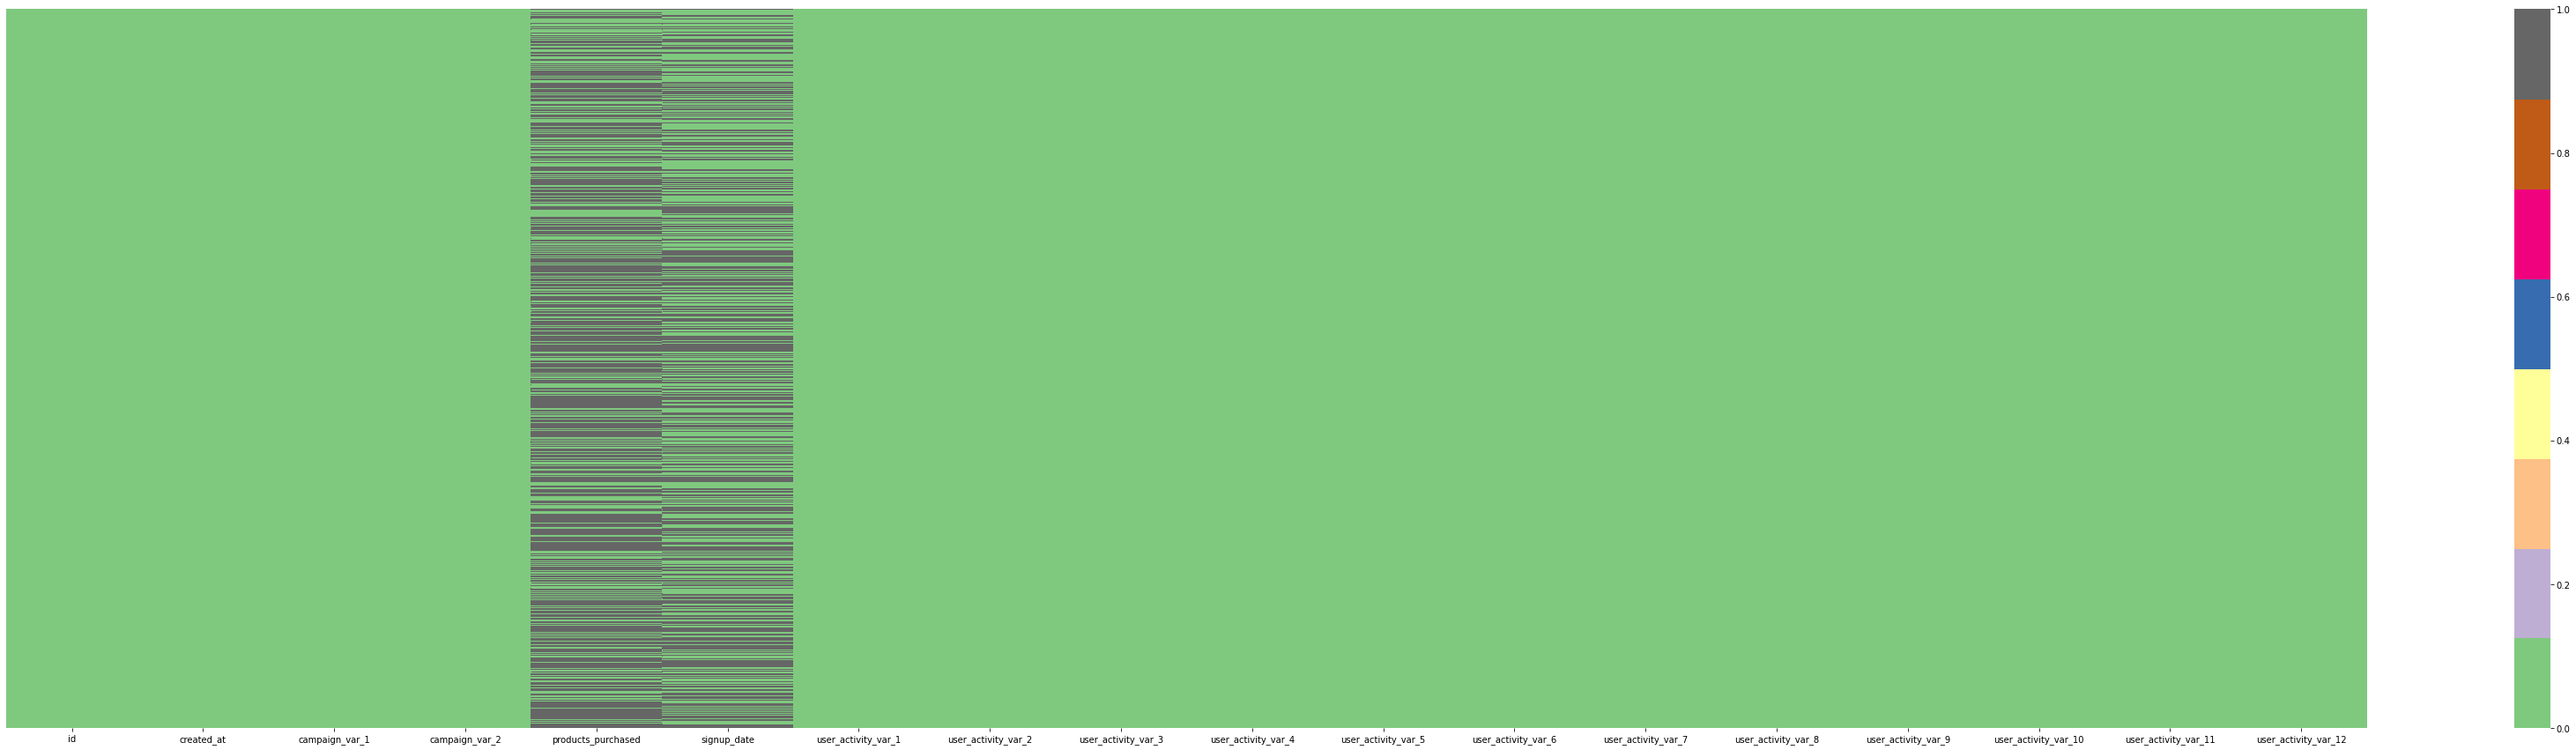

In [72]:
plt.figure(figsize = (60,15))
sns.heatmap(test_data.isnull(), yticklabels = False , cmap = 'Accent')
plt.show()

In [73]:
test_data['products_purchased'].fillna(test_data['products_purchased'].mean(), inplace = True)

In [74]:
test_data['products_purchased']= test_data['products_purchased'].astype('int32')

In [75]:
test_data['created_at'] = pd.to_datetime(test_data['created_at'], format = '%Y-%m-%dT', errors = 'coerce')

In [76]:
test_data['created_at_year'] = test_data['created_at'].dt.year
test_data['created_at_month'] = test_data['created_at'].dt.month
test_data['created_at_day'] = test_data['created_at'].dt.day

In [77]:
test_data.head()

,id,created_at,campaign_var_1,campaign_var_2,products_purchased,signup_date,user_activity_var_1,user_activity_var_2,user_activity_var_3,user_activity_var_4,...,user_activity_var_6,user_activity_var_7,user_activity_var_8,user_activity_var_9,user_activity_var_10,user_activity_var_11,user_activity_var_12,created_at_year,created_at_month,created_at_day
0,39162,2022-01-01,2,2,2,2021-08-17,1,1,0,0,...,1,0,0,0,0,1,0,2022,1,1
1,39163,2022-01-01,4,7,3,2020-05-21,1,0,0,0,...,0,0,1,0,0,0,0,2022,1,1
2,39164,2022-01-01,8,7,2,NaN,0,0,0,0,...,1,0,0,0,0,0,0,2022,1,1
3,39165,2022-01-01,9,8,2,2020-06-22,0,0,0,0,...,1,1,0,0,0,2,0,2022,1,1
4,39166,2022-01-01,4,5,2,2021-03-10,1,0,0,0,...,0,0,0,0,0,0,0,2022,1,1


In [78]:
test_data.drop([ 'signup_date', 'created_at'], axis = 1, inplace = True)

In [79]:
test_data['created_at_year'].unique()

array([2022], dtype=int64)

In [80]:
test_data.drop('created_at_year', axis = 1, inplace = True)

<AxesSubplot:>

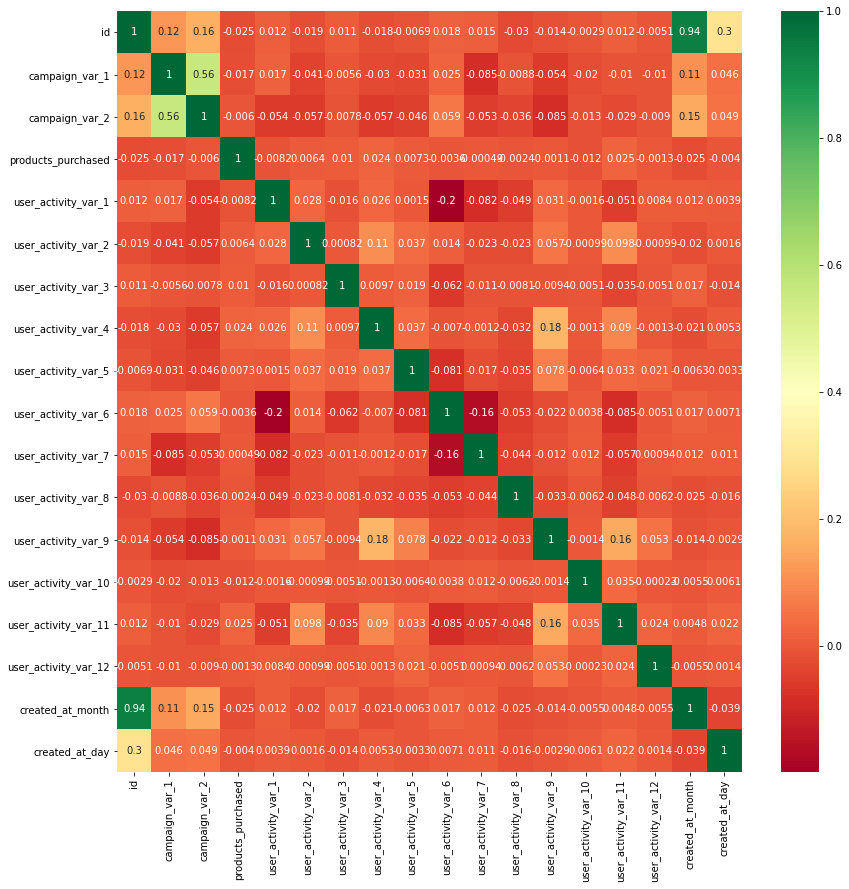

In [81]:
plt.figure(figsize= (14,14) )
sns.heatmap(test_data.corr(), annot = True , cmap = 'RdYlGn')

In [82]:
test_pred = saved_model.predict(test_data)

In [83]:
test_pred

array([1, 0, 0, ..., 0, 0, 0], dtype=int64)

In [84]:
submission = pd.DataFrame({'id': test_data['id'], 'buy': test_pred})

In [85]:
submission

,id,buy
0,39162,1
1,39163,0
2,39164,0
3,39165,1
4,39166,0
...,...,...
13179,52341,0
13180,52342,0
13181,52343,0
13182,52344,0


In [86]:
submission.to_csv('final_submission.csv', index = False)